In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn import preprocessing

from multiprocessing import Pool
from functools import partial

from CrossValidation import *
from FeatureSimilarity import GetTopGenes
from MatrixFactorization import CreateLatentVariables, FactorizeMatrix, GetRepresentationError

from utils import *

In [2]:
n = 100
g = 1000
o = 10
k = 20
genesImpactingPhenotype = 50

In [3]:
X_cls, y_cls = make_classification(n_samples=g, n_features=n, n_informative=20, n_redundant=20,
                                   n_repeated=0, n_classes=k, n_clusters_per_class=5, weights=None, 
                                   flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, 
                                   shuffle=True, random_state=None)
X_cls = X_cls.T
binaryPathwayMatrix = np.zeros((g, k))
binaryPathwayMatrix[np.arange(g), y_cls] = 1
Y, geneCoeffs = GenerateRegressedPhenotype(X_cls, numPhenotypes=o, lam=genesImpactingPhenotype, binaryPathwayMatrix=None, coeffSigma=0.1)
X = np.concatenate([Y, X_cls], axis=1)
neighbors = GetNeighborDictionary(binaryPathwayMatrix)
g = g + o

In [4]:
X_scaled = preprocessing.scale(X)

In [5]:
pca_model = PCA()
pca_model.fit(X_scaled)
latent_dim = np.min(np.where(np.cumsum(pca_model.explained_variance_ratio_) > 0.9)[0])
latent_dim

15

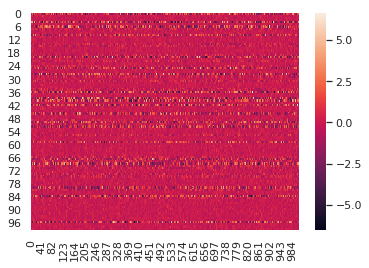

In [6]:
sns.heatmap(X_scaled)

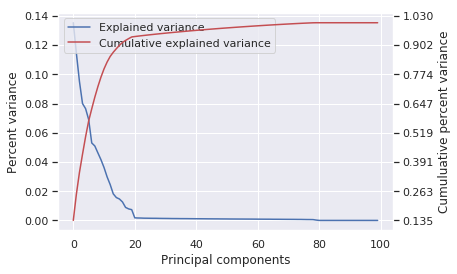

In [7]:
ScreePlot(X_scaled)

In [8]:
num_folds=5
hyper_params = RandomParams(eta_low=0.05, eta_high=0.15, lamb1_low=0.01, lamb1_high=0.04, lamb2_low=0.001, lamb2_high=0.01, num_reps=50)
errorsDF, trainErrorDF, testErrorDF = CrossValidation(X_scaled, latent_dim, hyper_params, neighbors=neighbors, foldcount=num_folds, returnVectorDF=True)

Training fold 0
Training fold 1
Training fold 2
Training fold 3
Training fold 4
..........................................................................................................................................................................................................................................................

In [9]:
meanErrorsDf = GetMeanErrorDF(errorsDF, num_folds)
bestParamsIndex = meanErrorsDf['error'].idxmin(axis=1)
eta, lamb1, lamb2, _ = meanErrorsDf.iloc[bestParamsIndex].values
print(meanErrorsDf.iloc[bestParamsIndex])

eta      0.053705
lamb1    0.013012
lamb2    0.007704
error    0.294110
Name: 7, dtype: float64


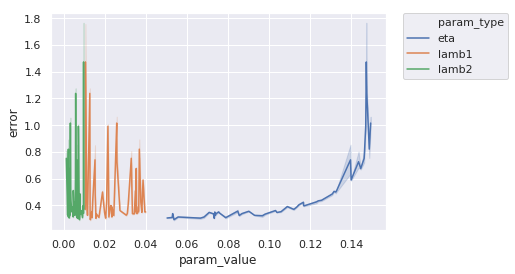

In [20]:
PlotParamDF(errorsDF)

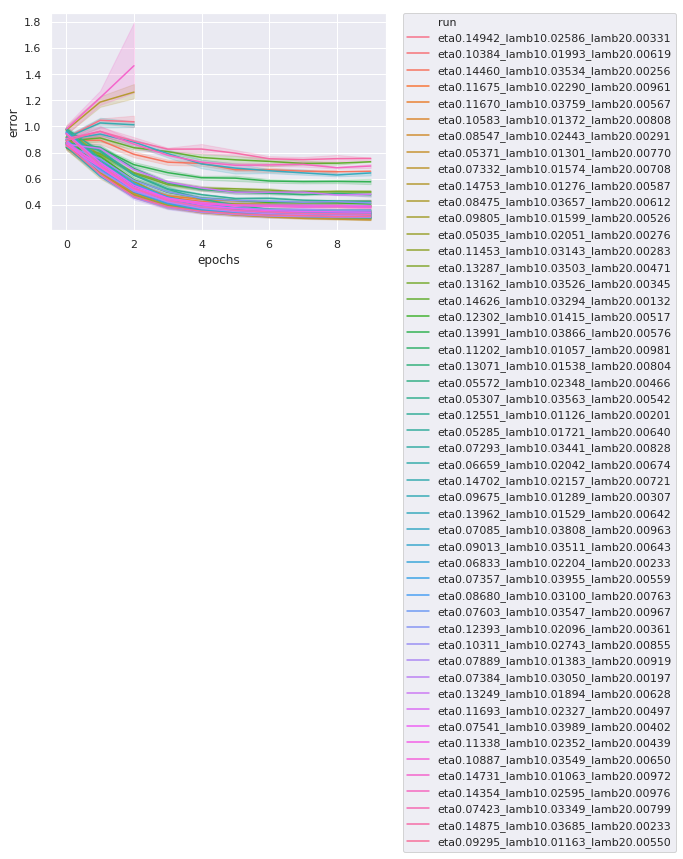

In [11]:
PlotErrorDF(testErrorDF)

In [12]:
hyper_params_nn = RandomParams(eta_low=0.05, eta_high=0.15, lamb1_low=0.01, lamb1_high=0.04, lamb2_low=0.0, lamb2_high=0.0, num_reps=50)
errorsDF_nn, trainErrorDF_nn, testErrorDF_nn = CrossValidation(X_scaled, latent_dim, hyper_params_nn, neighbors={}, foldcount=5, returnVectorDF=True)

Training fold 0
Training fold 1
Training fold 2
Training fold 3
Training fold 4
..........................................................................................................................................................................................................................................................

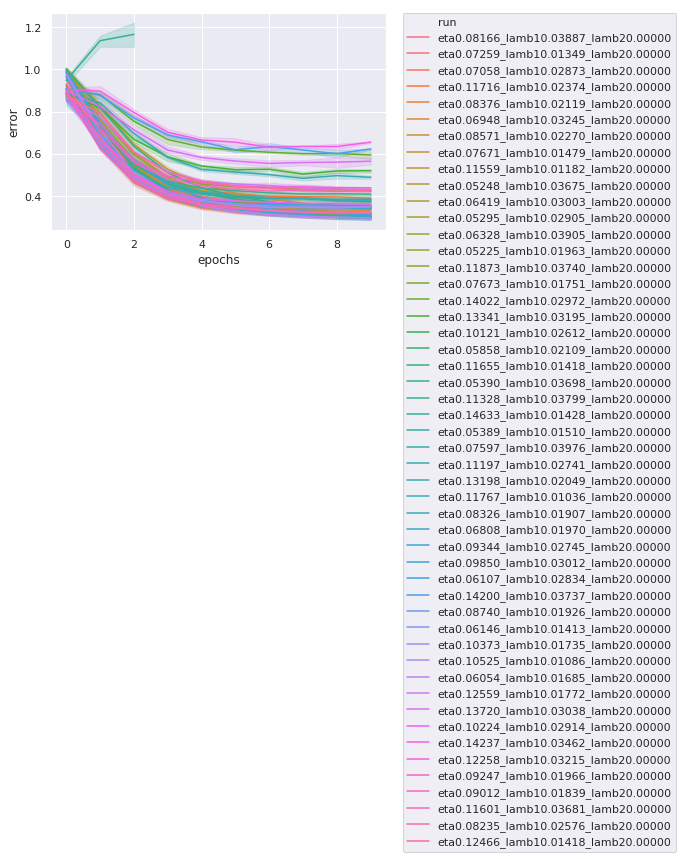

In [13]:
PlotErrorDF(testErrorDF_nn)

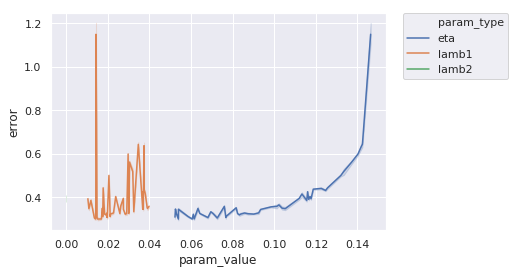

In [19]:
PlotParamDF(errorsDF_nn)

In [15]:
meanErrorsDf_nn = GetMeanErrorDF(errorsDF_nn, num_folds)
bestParamsIndex_nn = meanErrorsDf_nn['error'].idxmin(axis=1)
eta_nn, lamb1_nn, lamb2_nn, _ = meanErrorsDf_nn.iloc[bestParamsIndex_nn].values
print(meanErrorsDf_nn.iloc[bestParamsIndex_nn])

eta      0.053890
lamb1    0.015103
lamb2    0.000000
error    0.300928
Name: 24, dtype: float64
